<a href="https://colab.research.google.com/github/HongSeongMo/Airbnb/blob/main/airbnb_lecture_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7강. 매출예측 모델 검증

검증 데이터 읽기

In [2]:
import pandas as pd

In [3]:
# 검증 데이터 가져오기
path = 'drive/MyDrive/letuin/airbnb/data'

X_test = pd.read_csv(f'{path}/x_test.csv')
y_test = pd.read_csv(f'{path}/y_test.csv')

학습된 모델 가져오기

In [4]:
import joblib

# path
path_model = 'drive/MyDrive/letuin/airbnb/model'

Linear Model

In [5]:
# linear model
model_linear = joblib.load(f"{path_model}/model_linear.pkl")

In [6]:
model_linear

LinearRegression()

Tree Model

In [7]:
# tree model
model_tree = joblib.load(f"{path_model}/model_tree.pkl")

In [8]:
model_tree

DecisionTreeRegressor(max_leaf_nodes=100)

Random Forest Regressor

*   싸이킷런 공식 문서 :

In [9]:
# random forest model
model_rf = joblib.load(f"{path_model}/model_rf.pkl")

In [10]:
model_rf

RandomForestRegressor(max_depth=5, max_leaf_nodes=30, random_state=1)

XGBoost Regressor
*   XGBoost 공식문서 :

In [11]:
# xgboost model
model_xgb = joblib.load(f"{path_model}/model_xgb.pkl")

In [12]:
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaf_nodes=30,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

모델 성능 비교

매출 예측

In [13]:
X_test.head()

,accommodates,availability_365,calculated_host_listings_count,minimum_maximum_nights,latitude,number_of_reviews,maximum_minimum_nights,review_scores_value,review_scores_accuracy,review_scores_location,...,host_response_rate,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h
0,2,0,1,1125.0,51.577750,1,1.0,5.000000,5.000000,5.000000,...,0.0,0.0,1,0,0,0,0,0,0,0
1,1,23,1,365.0,51.517741,0,10.0,4.598477,4.715774,4.720782,...,100.0,75.0,1,0,0,0,0,0,1,0
2,2,217,4,365.0,51.548278,0,3.0,4.598477,4.715774,4.720782,...,100.0,100.0,0,0,1,0,0,0,0,1
3,1,283,30,1125.0,51.513060,10,3.0,4.800000,4.800000,4.800000,...,100.0,99.0,0,0,1,0,0,0,0,1
4,2,0,1,1125.0,51.448470,0,1.0,4.598477,4.715774,4.720782,...,0.0,0.0,0,0,1,0,0,0,0,0


In [14]:
# Impute missing values in X_train
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_test = imputer.fit_transform(X_test)

In [15]:
X_test = pd.DataFrame(X_test, columns=['accommodates', 'availability_365', 'calculated_host_listings_count',
       'minimum_maximum_nights', 'latitude', 'number_of_reviews',
       'maximum_minimum_nights', 'review_scores_value',
       'review_scores_accuracy', 'review_scores_location',
       'review_scores_checkin', 'host_listings_count', 'reviews_per_month',
       'review_scores_rating', 'maximum_nights_avg_ntm', 'maximum_nights',
       'minimum_nights', 'number_of_reviews_ltm', 'review_scores_cleanliness',
       'availability_30', 'host_total_listings_count',
       'review_scores_communication',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'minimum_nights_avg_ntm', 'availability_90', 'minimum_minimum_nights',
       'maximum_maximum_nights', 'longitude',
       'calculated_host_listings_count_shared_rooms', 'number_of_reviews_l30d',
       'availability_60', 'beds', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'has_availability', 'instant_bookable',
       'host_since', 'last_review', 'first_review', 'price',
       'host_response_rate', 'host_acceptance_rate', 'room_entire',
       'room_hotel', 'room_private', 'room_shared', 'response_3d',
       'response_1d', 'response_3h', 'response_1h'])

In [16]:
# predict by each model
y_pred_linear = model_linear.predict(X_test)
y_pred_tree = model_tree.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [17]:
y_pred_linear

array([[-394.35338618],
       [-426.86718792],
       [-546.75403991],
       ...,
       [-224.92168542],
       [-309.28055964],
       [2703.54025661]])

In [18]:
y_pred_tree

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
y_pred_rf

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
y_pred_xgb

array([6.1331787e-07, 6.1331787e-07, 6.1331787e-07, ..., 6.1331787e-07,
       6.1331787e-07, 6.1331787e-07], dtype=float32)

array to dataframe

In [21]:
import numpy as np

In [22]:
np.hstack(y_pred_linear)

array([-394.35338618, -426.86718792, -546.75403991, ..., -224.92168542,
       -309.28055964, 2703.54025661])

In [23]:
np.column_stack((np.hstack(y_pred_linear), y_pred_tree, y_pred_rf, y_pred_xgb))

array([[-3.94353386e+02,  0.00000000e+00,  0.00000000e+00,
         6.13317866e-07],
       [-4.26867188e+02,  0.00000000e+00,  0.00000000e+00,
         6.13317866e-07],
       [-5.46754040e+02,  0.00000000e+00,  0.00000000e+00,
         6.13317866e-07],
       ...,
       [-2.24921685e+02,  0.00000000e+00,  0.00000000e+00,
         6.13317866e-07],
       [-3.09280560e+02,  0.00000000e+00,  0.00000000e+00,
         6.13317866e-07],
       [ 2.70354026e+03,  0.00000000e+00,  0.00000000e+00,
         6.13317866e-07]])

In [24]:
y_pred_df = pd.DataFrame(np.column_stack((np.hstack(y_pred_linear), y_pred_tree, y_pred_rf, y_pred_xgb)),
                         columns=['pred_linear', 'pred_tree', 'pred_rf', 'pred_xgb'])

y_pred_df.head()

,pred_linear,pred_tree,pred_rf,pred_xgb
0,-394.353386,0.0,0.0,6.133179e-07
1,-426.867188,0.0,0.0,6.133179e-07
2,-546.754040,0.0,0.0,6.133179e-07
3,-310.600973,0.0,0.0,6.133179e-07
4,135.407750,0.0,0.0,6.133179e-07


실제 revenue 와 merge

In [25]:
y_test

,revenue
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
30282,0.0
30283,0.0
30284,0.0
30285,0.0


In [26]:
y_test = pd.concat([y_test, y_pred_df], axis=1)
y_test.head()

,revenue,pred_linear,pred_tree,pred_rf,pred_xgb
0,0.0,-394.353386,0.0,0.0,6.133179e-07
1,0.0,-426.867188,0.0,0.0,6.133179e-07
2,0.0,-546.754040,0.0,0.0,6.133179e-07
3,0.0,-310.600973,0.0,0.0,6.133179e-07
4,0.0,135.407750,0.0,0.0,6.133179e-07


Target Value 비교: 실제 vs 예측

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,10)

<Axes: xlabel='revenue', ylabel='pred_linear'>

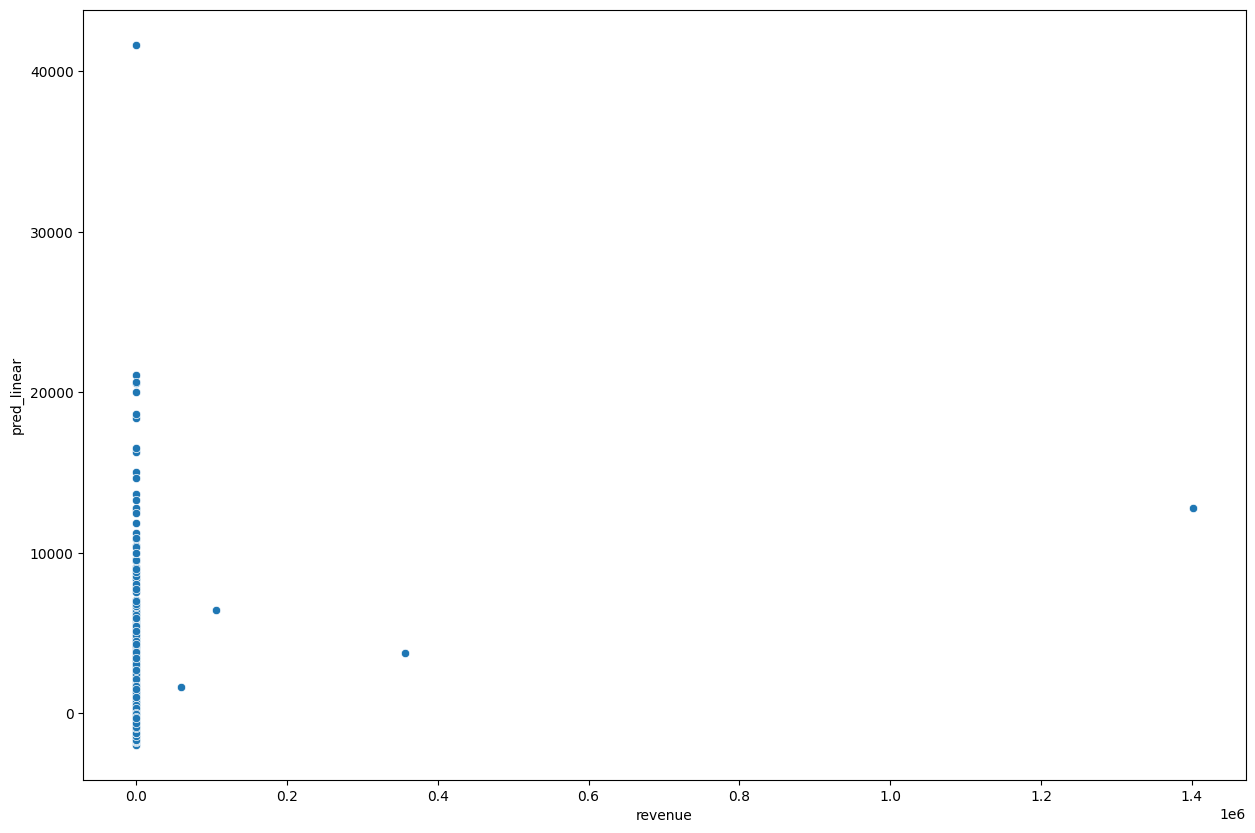

In [28]:
sns.scatterplot(data = y_test,
                x = 'revenue',
                y = 'pred_linear')

<Axes: xlabel='revenue', ylabel='pred_tree'>

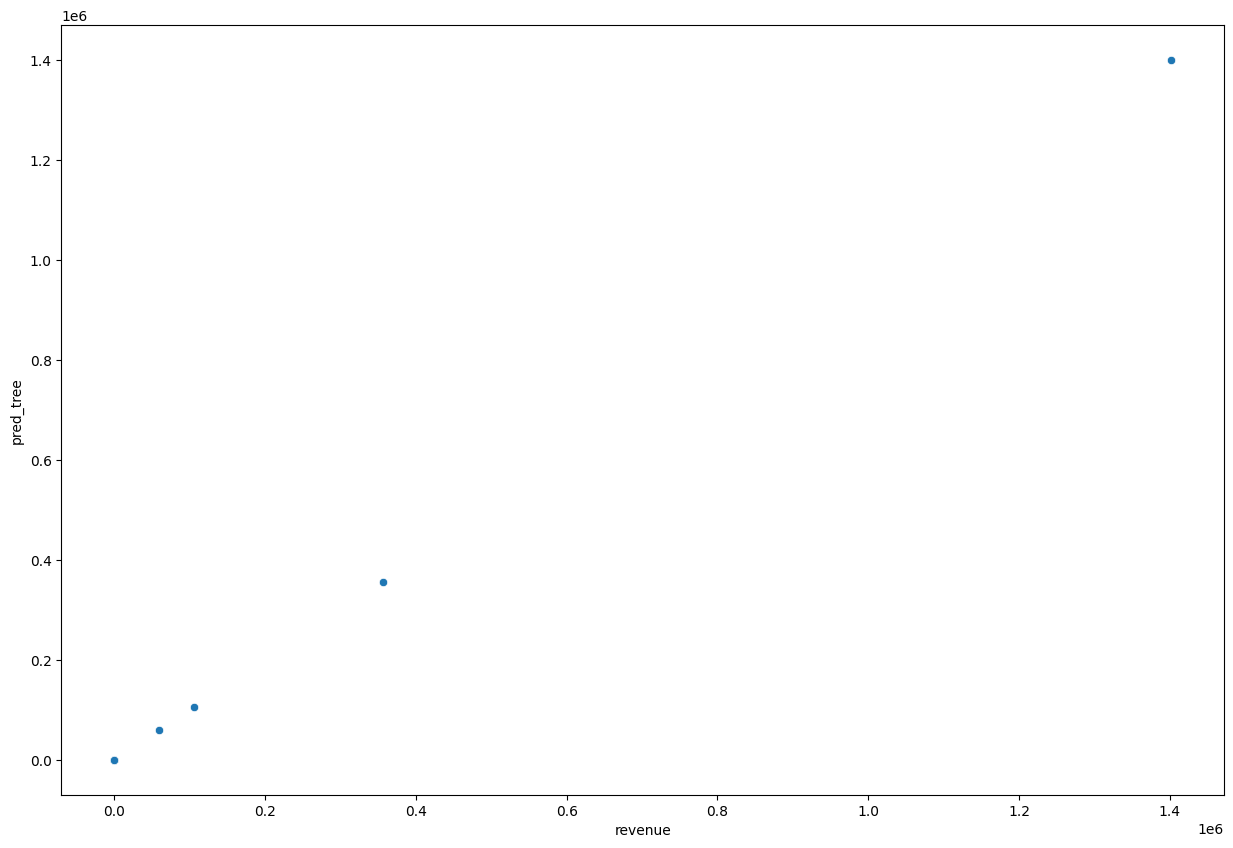

In [29]:
sns.scatterplot(data = y_test,
                x = 'revenue',
                y = 'pred_tree')

<Axes: xlabel='revenue', ylabel='pred_rf'>

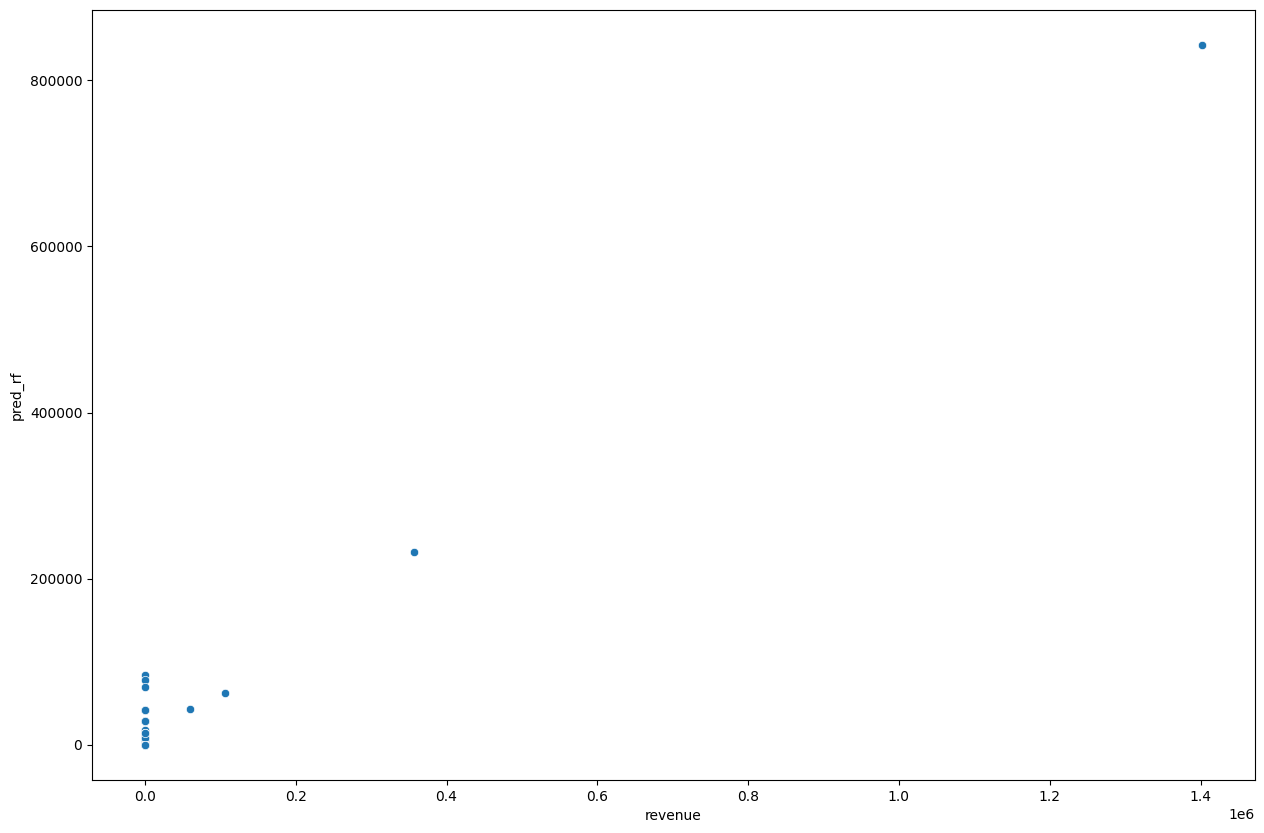

In [30]:
sns.scatterplot(data = y_test,
                x = 'revenue',
                y = 'pred_rf')

<Axes: xlabel='revenue', ylabel='pred_xgb'>

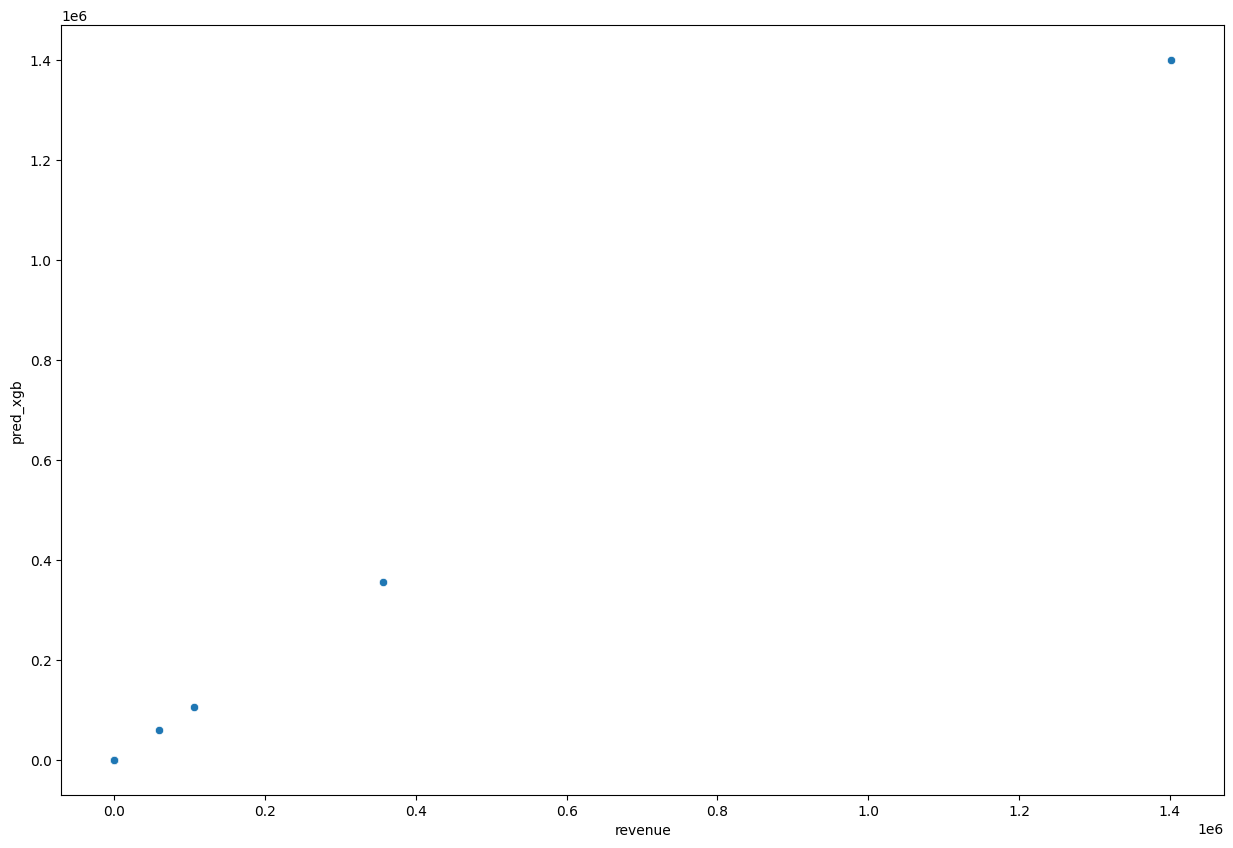

In [31]:
sns.scatterplot(data = y_test,
                x = 'revenue',
                y = 'pred_xgb')

모델간 지표 비교 : MAE, MAPE

In [32]:
from sklearn.metrics import mean_absolute_error

# define mape
def mape(actual, pred):
    mape = (np.abs(pred - actual)/actual).median()*100
    return mape

In [42]:
perf_df = pd.DataFrame()

In [43]:
model_list = ['linear', 'tree', 'rf', 'xgb']

In [44]:
for model in model_list:
    perf_df.loc[model, 'mae'] = mean_absolute_error(y_test.revenue, y_test[f"pred_{model}"])
    perf_df.loc[model, "mape"] = mape(y_test.revenue, y_test[f'pred_{model}'])

In [46]:
perf_df

,mae,mape
linear,471.252194,inf
tree,0.000000,0.0
rf,48.205318,inf
xgb,0.000018,inf


In [47]:
perf_df = perf_df.reset_index()
perf_df

,index,mae,mape
0,linear,471.252194,inf
1,tree,0.000000,0.0
2,rf,48.205318,inf
3,xgb,0.000018,inf


<Axes: xlabel='index', ylabel='mae'>

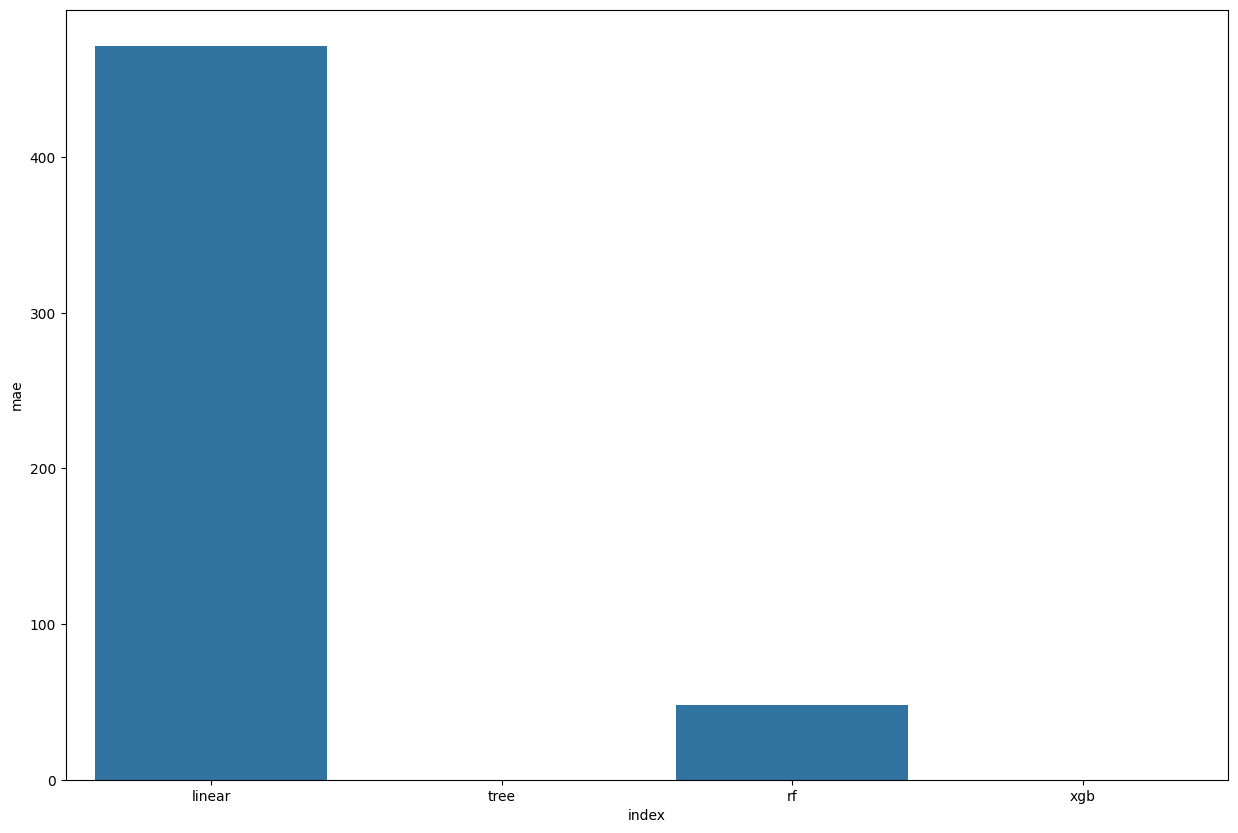

In [48]:
# mae 시각화
sns.barplot(data = perf_df,
            x = 'index',
            y = 'mae')

<Axes: xlabel='index', ylabel='mape'>

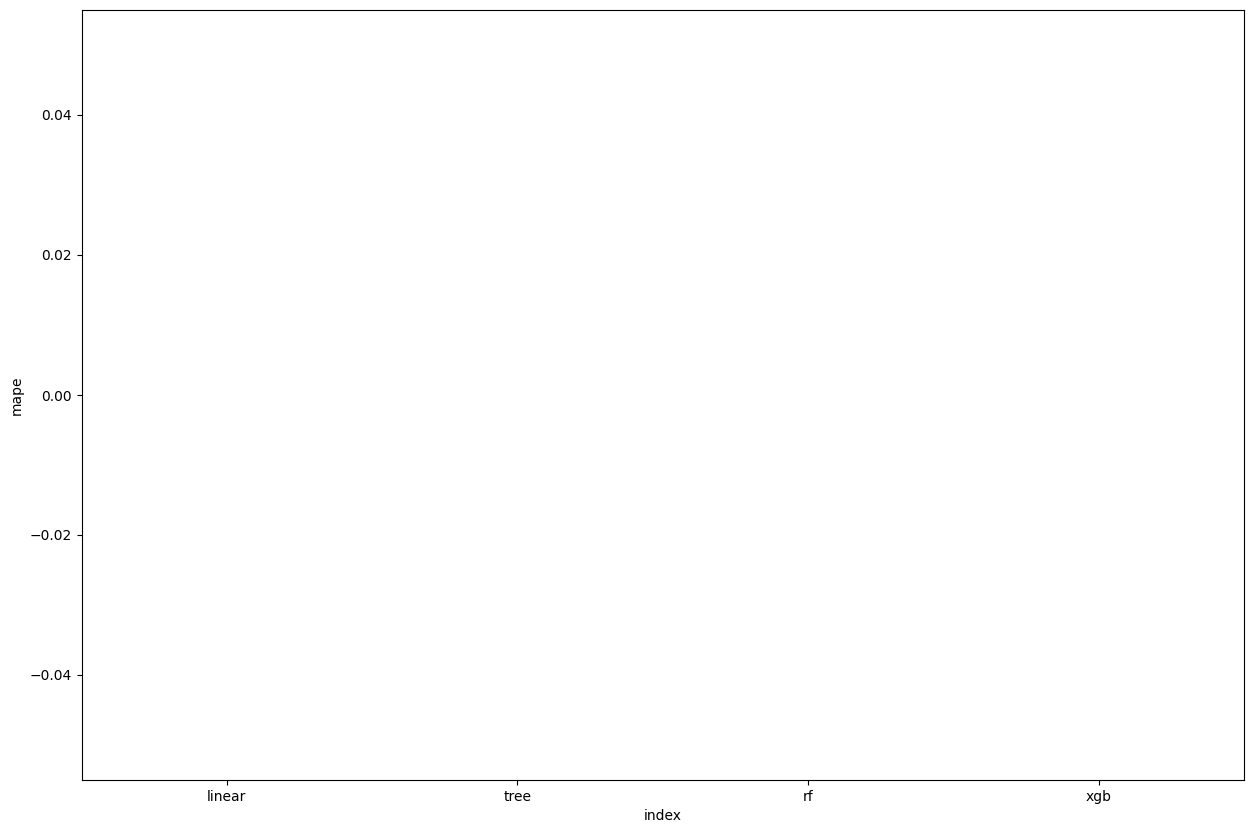

In [49]:
# mape 시각화
sns.barplot(data = perf_df,
            x = 'index',
            y = 'mape')

예측결과 저장

In [50]:
y_test.to_csv(f'{path}/y_pred.csv',
              index = False)